# Baseline CNN Training

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
DATA_DIR = "../data/processed"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
# Normalize pixel values to [0,1]
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = val_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 17498 images belonging to 2 classes.
Found 3748 images belonging to 2 classes.
Found 3752 images belonging to 2 classes.


In [7]:
def build_baseline_cnn(input_shape=(128,128,3)):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(128, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid")  # binary classification
    ])
    
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_baseline_cnn(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Next, training the model.

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 184s 332ms/step - accuracy: 0.6323 - loss: 0.6397 - val_accuracy: 0.6878 - val_loss: 0.5828
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 169s 309ms/step - accuracy: 0.7343 - loss: 0.5321 - val_accuracy: 0.7236 - val_loss: 0.5500
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 172s 314ms/step - accuracy: 0.7868 - loss: 0.4541 - val_accuracy: 0.7783 - val_loss: 0.4666
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 162s 296ms/step - accuracy: 0.8213 - loss: 0.3918 - val_accuracy: 0.7970 - val_loss: 0.4374
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 152s 278ms/step - accuracy: 0.8554 - loss: 0.3247 - val_accuracy: 0.7988 - val_loss: 0.4439
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 150s 274ms/step - accuracy: 0.8963 - loss: 0.2506 - val_accuracy: 0.8162 - val_loss: 0.4655
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 151s 276ms/step - accuracy: 0.9371 - loss: 0.1573 - val_accuracy: 0.7935 - val_loss: 0.5434
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 148s 271ms/step - accuracy: 0.9667 -

Here we clearly have an overfitting problem, the training accuracy reached 0.988, whereas the validation accuracy is at 0.795. The training loss keeps getting lower, while validation loss was increasing after 5th epoch. We can introduce dropout, data augmentation, early stopping to prevent overfitting.

Let's see training vs validation accuracy at loss on graphs:

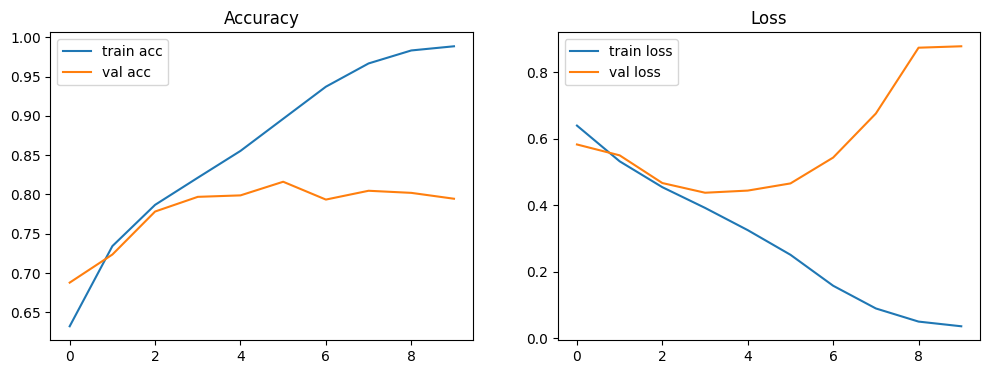

In [9]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss")

plt.show()

Now, let's see how the model performs on the test data.

In [10]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2%}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.7990 - loss: 0.9176
✅ Test Accuracy: 79.90%


Saving the model:

In [11]:
os.makedirs("../saved_models", exist_ok=True)
model.save("../saved_models/baseline_cnn.h5")

## Fixing the overfitting

Few things should be done for this stage:
- Add Dropout layers.
- Add EarlyStopping callback.
- Try padded dataset (data/processed_padding/) (optional)

In [3]:
DATA_DIR = "../data/processed"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 30

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = val_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 17498 images belonging to 2 classes.
Found 3748 images belonging to 2 classes.
Found 3752 images belonging to 2 classes.


In [7]:
def build_improved_cnn(input_shape=(128,128,3)):

    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_improved_cnn(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("../saved_models/best_cnn.h5", save_best_only=True)
]

In [9]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5300 - loss: 0.7200

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 ━━━━━━━━━━━━━━━━━━━━ 216s 388ms/step - accuracy: 0.5587 - loss: 0.6855 - val_accuracy: 0.6179 - val_loss: 0.6579
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6278 - loss: 0.6420

547/547 ━━━━━━━━━━━━━━━━━━━━ 208s 380ms/step - accuracy: 0.6476 - loss: 0.6260 - val_accuracy: 0.7017 - val_loss: 0.5718
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.6934 - loss: 0.5845

547/547 ━━━━━━━━━━━━━━━━━━━━ 197s 360ms/step - accuracy: 0.7015 - loss: 0.5764 - val_accuracy: 0.7295 - val_loss: 0.5264
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 187s 341ms/step - accuracy: 0.7241 - loss: 0.5470 - val_accuracy: 0.7303 - val_loss: 0.5269
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.7384 - loss: 0.5270

547/547 ━━━━━━━━━━━━━━━━━━━━ 200s 365ms/step - accuracy: 0.7445 - loss: 0.5208 - val_accuracy: 0.7663 - val_loss: 0.4705
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.7640 - loss: 0.4923

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.7591 - loss: 0.4973 - val_accuracy: 0.7930 - val_loss: 0.4369
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.7732 - loss: 0.4782 - val_accuracy: 0.7972 - val_loss: 0.4373
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.7778 - loss: 0.4653

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.7821 - loss: 0.4618 - val_accuracy: 0.8292 - val_loss: 0.3905
Epoch 9/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7946 - loss: 0.4482

547/547 ━━━━━━━━━━━━━━━━━━━━ 179s 328ms/step - accuracy: 0.7944 - loss: 0.4465 - val_accuracy: 0.8300 - val_loss: 0.3795
Epoch 10/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.8036 - loss: 0.4298 - val_accuracy: 0.8202 - val_loss: 0.3877
Epoch 11/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.8052 - loss: 0.4303

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.8083 - loss: 0.4242 - val_accuracy: 0.8410 - val_loss: 0.3610
Epoch 12/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8112 - loss: 0.4144

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.8136 - loss: 0.4165 - val_accuracy: 0.8575 - val_loss: 0.3440
Epoch 13/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 175s 320ms/step - accuracy: 0.8186 - loss: 0.4029 - val_accuracy: 0.8439 - val_loss: 0.3485
Epoch 14/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8306 - loss: 0.3862

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 321ms/step - accuracy: 0.8287 - loss: 0.3841 - val_accuracy: 0.8503 - val_loss: 0.3344
Epoch 15/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.8337 - loss: 0.3752

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 322ms/step - accuracy: 0.8330 - loss: 0.3764 - val_accuracy: 0.8597 - val_loss: 0.3335
Epoch 16/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8321 - loss: 0.3747

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 321ms/step - accuracy: 0.8319 - loss: 0.3751 - val_accuracy: 0.8642 - val_loss: 0.3251
Epoch 17/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8331 - loss: 0.3721

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 321ms/step - accuracy: 0.8346 - loss: 0.3711 - val_accuracy: 0.8658 - val_loss: 0.3094
Epoch 18/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8467 - loss: 0.3560

547/547 ━━━━━━━━━━━━━━━━━━━━ 175s 321ms/step - accuracy: 0.8410 - loss: 0.3633 - val_accuracy: 0.8863 - val_loss: 0.2861
Epoch 19/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 321ms/step - accuracy: 0.8500 - loss: 0.3506 - val_accuracy: 0.8783 - val_loss: 0.2943
Epoch 20/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.8435 - loss: 0.3587

547/547 ━━━━━━━━━━━━━━━━━━━━ 177s 323ms/step - accuracy: 0.8483 - loss: 0.3514 - val_accuracy: 0.8871 - val_loss: 0.2734
Epoch 21/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 175s 320ms/step - accuracy: 0.8453 - loss: 0.3507 - val_accuracy: 0.8741 - val_loss: 0.2980
Epoch 22/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 178s 326ms/step - accuracy: 0.8556 - loss: 0.3406 - val_accuracy: 0.8722 - val_loss: 0.2988
Epoch 23/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 177s 323ms/step - accuracy: 0.8553 - loss: 0.3349 - val_accuracy: 0.8885 - val_loss: 0.2748
Epoch 24/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8555 - loss: 0.3328

547/547 ━━━━━━━━━━━━━━━━━━━━ 175s 320ms/step - accuracy: 0.8541 - loss: 0.3344 - val_accuracy: 0.8871 - val_loss: 0.2691
Epoch 25/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 177s 324ms/step - accuracy: 0.8592 - loss: 0.3269 - val_accuracy: 0.8690 - val_loss: 0.3092
Epoch 26/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 175s 320ms/step - accuracy: 0.8587 - loss: 0.3210 - val_accuracy: 0.8773 - val_loss: 0.2891
Epoch 27/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8618 - loss: 0.3218

547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 321ms/step - accuracy: 0.8625 - loss: 0.3221 - val_accuracy: 0.9002 - val_loss: 0.2452
Epoch 28/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 176s 321ms/step - accuracy: 0.8625 - loss: 0.3233 - val_accuracy: 0.8858 - val_loss: 0.2796
Epoch 29/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 175s 321ms/step - accuracy: 0.8613 - loss: 0.3225 - val_accuracy: 0.8770 - val_loss: 0.2878
Epoch 30/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 177s 324ms/step - accuracy: 0.8667 - loss: 0.3109 - val_accuracy: 0.8965 - val_loss: 0.2488


Plotting the accuracy and loss graphs for train vs validation.

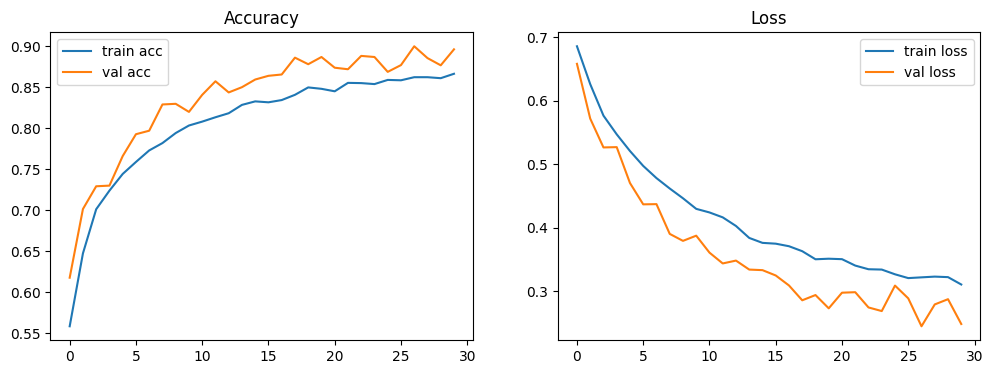

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss")

plt.show()

And finally, testing the model on the test set.

In [11]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.2%}")

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.8977 - loss: 0.2422
✅ Test Accuracy: 89.77%


This is a great improvement from the baseline model: the accuracy on the test dataset went up from 80% to almost 90%. Train accuracy is lower than before, but we fixed the overfitting issue, and now the model performs as good on the test set as on training set.

In [ ]:
MODEL_PATH = "../saved_models/best_cnn.h5"
DATA_DIR = "../data/processed"
model = load_model(MODEL_PATH)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 3752 images belonging to 2 classes.


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step


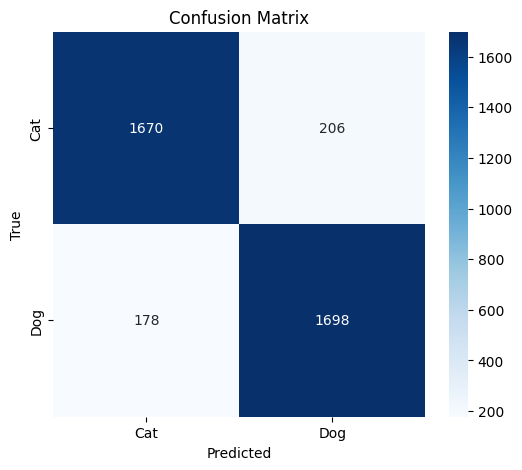

Classification Report:

              precision    recall  f1-score   support

         Cat       0.90      0.89      0.90      1876
         Dog       0.89      0.91      0.90      1876

    accuracy                           0.90      3752
   macro avg       0.90      0.90      0.90      3752
weighted avg       0.90      0.90      0.90      3752



In [6]:
# Predictions
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype("int32").ravel()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat", "Dog"],
            yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))

The errors are balanced, so the model isn't biased toward cats or dogs.  
Let's see some examples of misclassified images, so we know what type of images are causing issues.

Total misclassified: 384


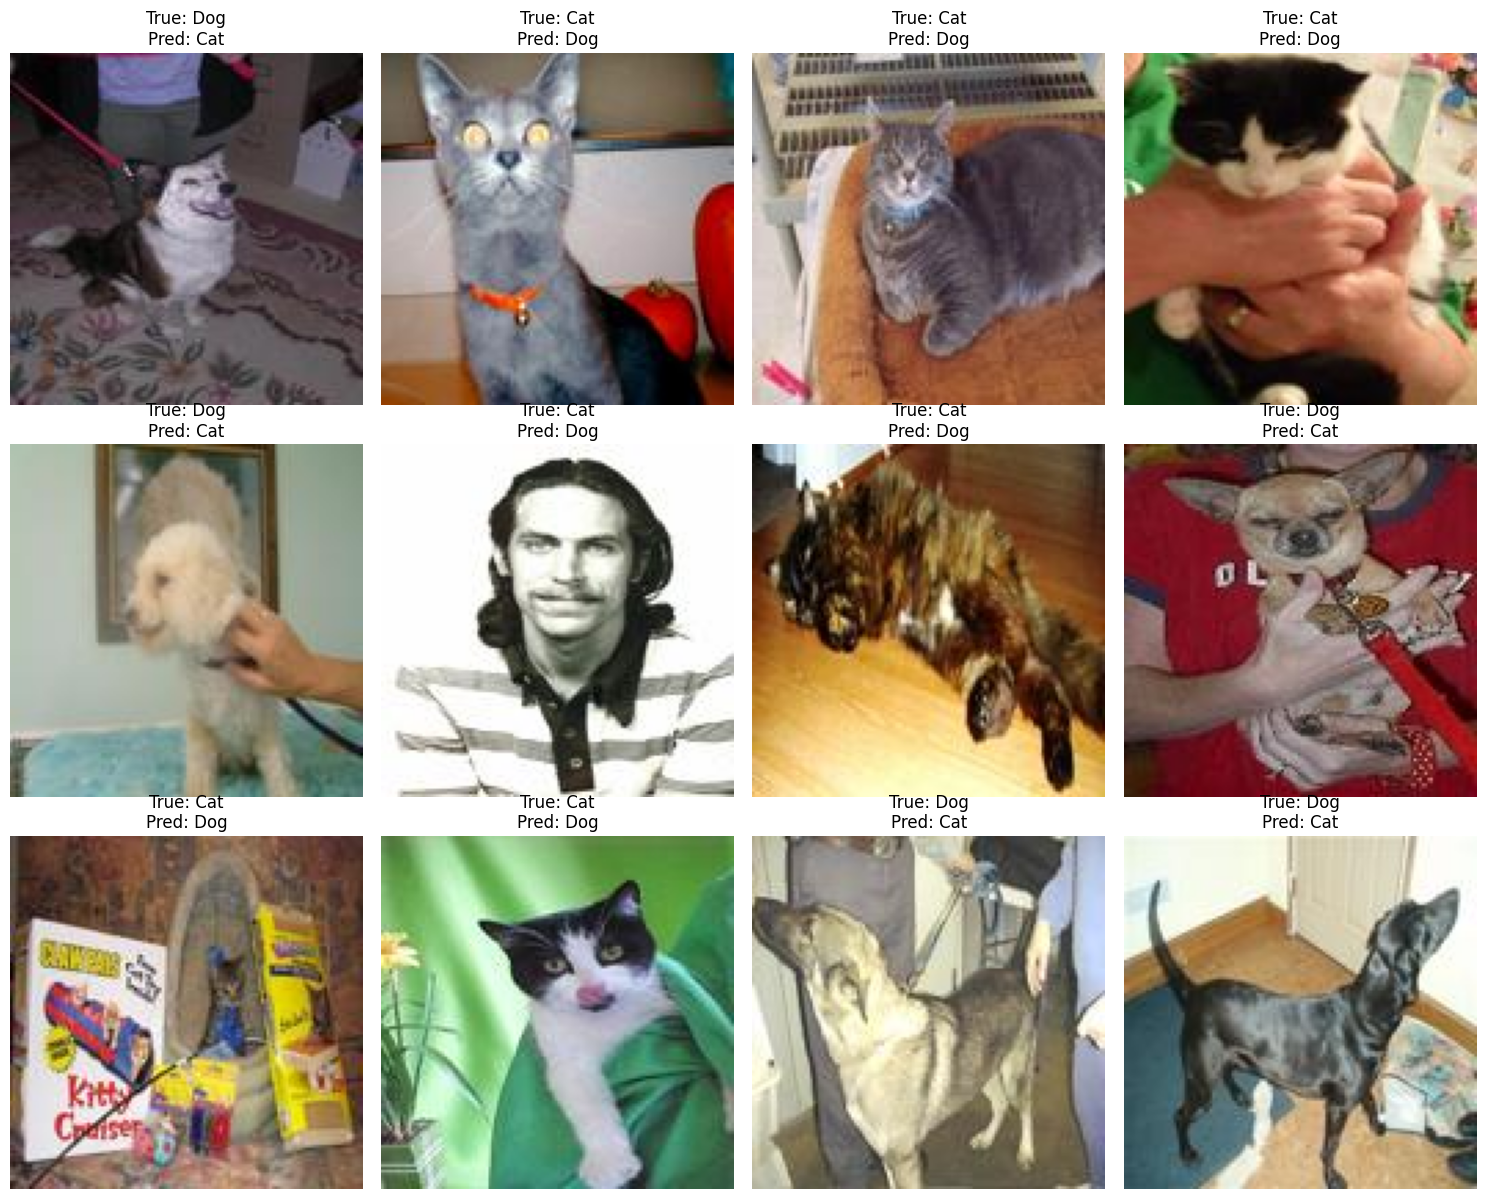

In [9]:
import matplotlib.image as mpimg

misclassified_idx = np.where(y_true != y_pred)[0]

print(f"Total misclassified: {len(misclassified_idx)}")

n = 12
plt.figure(figsize=(15, 12))

for i, idx in enumerate(np.random.choice(misclassified_idx, n, replace=False)):
    img_path = test_gen.filepaths[idx]
    img = mpimg.imread(img_path)

    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {'Cat' if y_true[idx]==0 else 'Dog'}\nPred: {'Cat' if y_pred[idx]==0 else 'Dog'}")

plt.tight_layout()
plt.show()

I think the main reasons are that in those photos the cats and dogs are in unusual poses, contain humans and other objects, or they are taken from odd angles.  

I think the next step is either do data augmentation and train the model again, or do transfer learning.